### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [1]:
import pandas as pd

df = pd.read_csv('./data/uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [3]:
# Convert the 'Date/Time' column to datetime format
df["Date/Time"] = pd.to_datetime(df["Date/Time"])

# Group by date and count the number of pickups
pickup_counts_by_date = df.groupby(df['Date/Time'].dt.date)['Date/Time'].count()

# Find the date with the highest number of pickups
date_with_highest_pickups = pickup_counts_by_date.idxmax()
date_with_highest_pickups


datetime.date(2014, 8, 7)

#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [4]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
df[df['Date/Time'].dt.date == date_with_highest_pickups]


# Get the count of pickups on the highest date
highest_date = pickup_counts_by_date.index.max()
pickup_count_on_highest_date = pickup_counts_by_date[highest_date]
pickup_count_on_highest_date


23271

#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [5]:
# Count the number of unique TLC base companies
unique_TLC_base_companies_count = df['Base'].nunique()
unique_TLC_base_companies_count



5

#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [6]:
# Group by TLC base company and count the number of pickups
TLC_base_companies = df["Date/Time"].groupby(df["Base"]).count()

# Find the TLC base company with the highest number of pickups
TLC_base_companies.idxmax()

'B02617'

#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [7]:
# Group by TLC base company and count the number of pickups
TLC_base_companies = df["Date/Time"].groupby(df["Base"]).count()
TLC_base_companies



Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
Name: Date/Time, dtype: int64

#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [12]:
# Extract the hour from the 'Date/Time' column
# df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Hour'] = df['Date/Time'].dt.hour


# Group by hour and count the number of pickups
Pickup_Count_by_Hour = df['Base'].groupby(df['Hour']).count()

# Find the hour with the highest number of pickups
Hour_with_highest_Pickup_Count = Pickup_Count_by_Hour.idxmax()
Hour_with_highest_Pickup_Count


17

#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

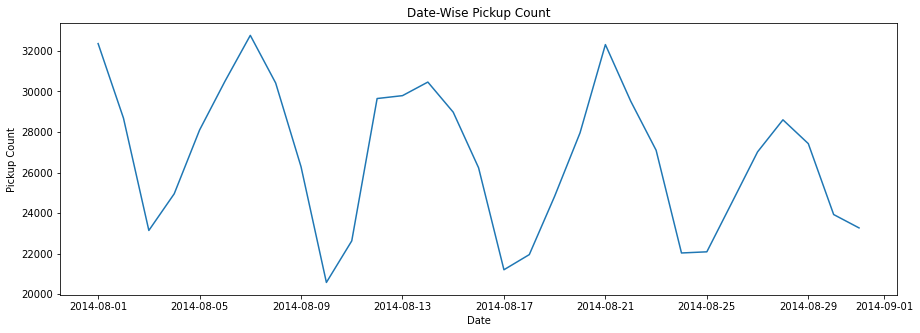

In [14]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
DateWise_Pickup_Count = df["Base"].groupby(df["Date/Time"].dt.date).count()
DateWise_Pickup_Count

# Create a line plot to visualize the number of pickups over time
x  = DateWise_Pickup_Count.index.tolist()
y  = DateWise_Pickup_Count.values.tolist()

# set figure size
plt.figure(figsize=(15, 5))

# set title
plt.title('Date-Wise Pickup Count')

# set axis labels
plt.xlabel('Date')
plt.ylabel('Pickup Count')

plt.plot(x, y)

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

<AxesSubplot:title={'center':'Uber pickups based on latitude and longitude'}, xlabel='Lat', ylabel='Lon'>

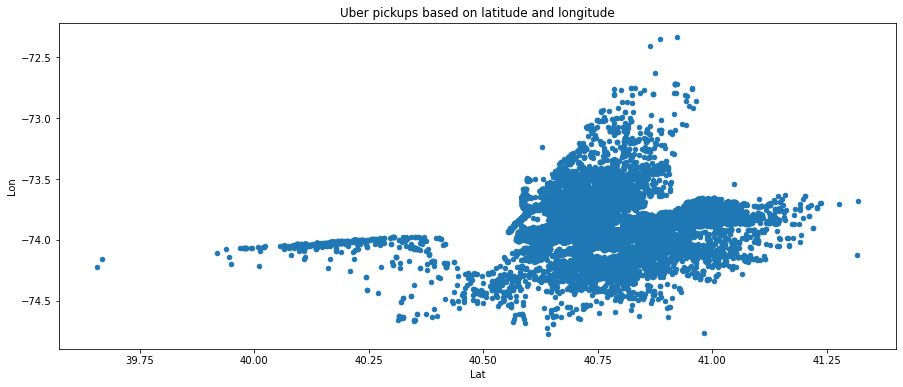

In [17]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
df.plot(kind = "scatter", x = "Lat", y = "Lon", figsize = (15,6), title = "Uber pickups based on latitude and longitude")

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

<AxesSubplot:title={'center':'Number of Uber Pickups for each TLC base company'}, xlabel='Base'>

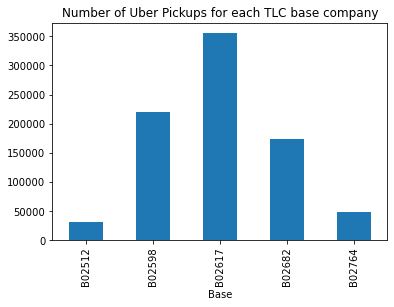

In [18]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
TLC_base_companies
x = TLC_base_companies.index.tolist()
y = x = TLC_base_companies.values.tolist()

TLC_base_companies.plot(kind = "bar", x = "x", y= "y", title = "Number of Uber Pickups for each TLC base company")


#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

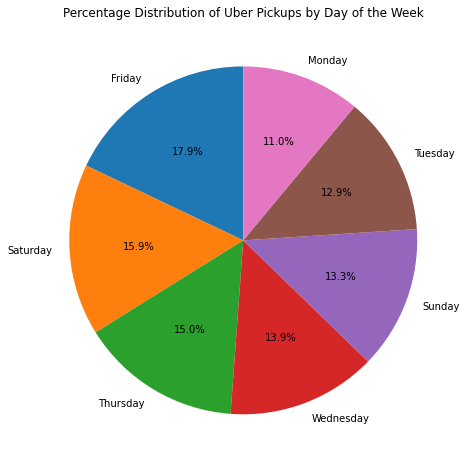

In [19]:
# Group by day of the week and count the number of pickups
df['day_of_week'] = df['Date/Time'].dt.day_name()
pickup_counts = df['day_of_week'].value_counts()

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.figure(figsize=(8, 8))
plt.pie(pickup_counts, labels=pickup_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Percentage Distribution of Uber Pickups by Day of the Week")
plt.show()